# Centrality in Networks

This notebook demonstrates various centrality measures in network analysis using NetworkX.

## Learning Objectives
- Understand different centrality measures
- Implement centrality calculations using NetworkX
- Visualize centrality distributions
- Compare different centrality measures

In [1]:
# Import required libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# For better display in notebooks
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Creating Example Networks

Let's start by creating simple example networks to demonstrate centrality measures.

In [2]:
# Create an undirected graph
G_undirected = nx.Graph()
edges_undirected = [(1, 2), (2, 3), (2, 4), (6, 3), (4, 5), (4, 6), (5, 6)]
G_undirected.add_edges_from(edges_undirected)

# Create a directed graph
G_directed = nx.DiGraph()
edges_directed = [(1, 2), (2, 4), (2, 3), (4, 5), (4, 6), (5, 6), (6, 3)]
G_directed.add_edges_from(edges_directed)

print(f"Undirected graph: {G_undirected.number_of_nodes()} nodes, {G_undirected.number_of_edges()} edges")
print(f"Directed graph: {G_directed.number_of_nodes()} nodes, {G_directed.number_of_edges()} edges")

Undirected graph: 6 nodes, 7 edges
Directed graph: 6 nodes, 7 edges


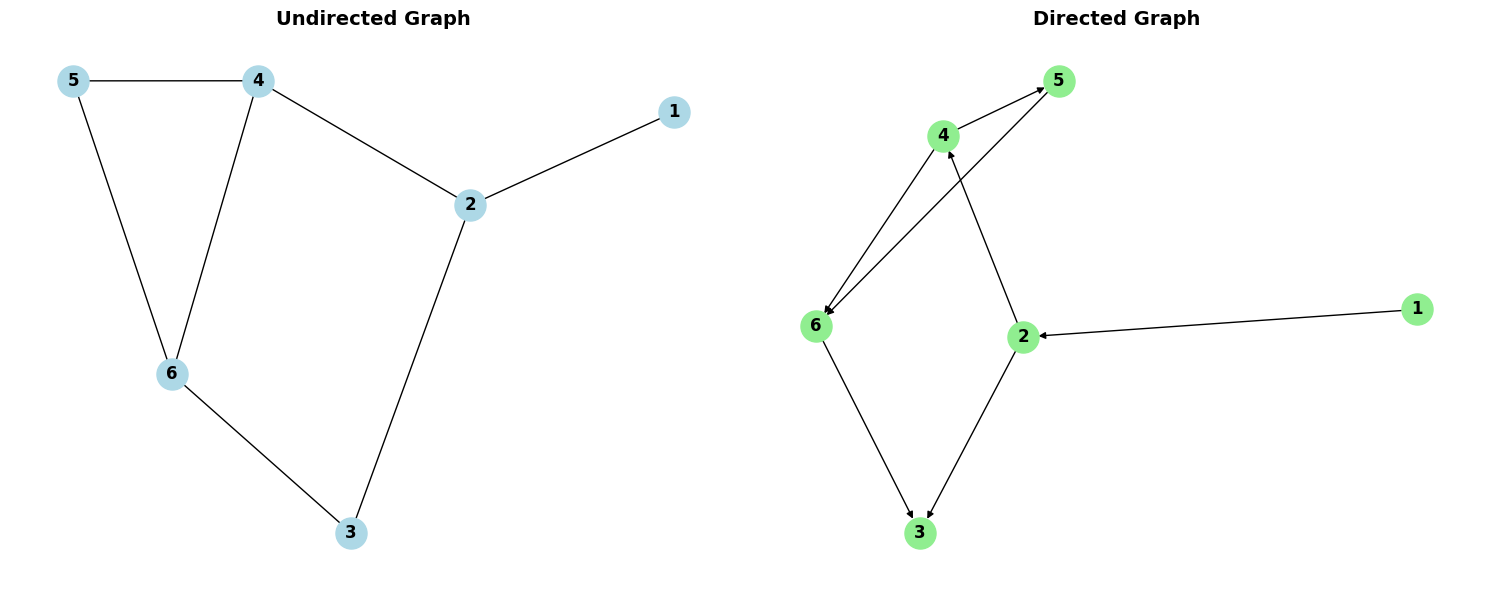

In [3]:
# Visualize the networks
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Undirected graph
pos1 = nx.spring_layout(G_undirected, seed=42)
nx.draw(G_undirected, pos1, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=12, font_weight='bold', ax=ax1)
ax1.set_title('Undirected Graph', fontsize=14, fontweight='bold')

# Directed graph
pos2 = nx.spring_layout(G_directed, seed=42)
nx.draw(G_directed, pos2, with_labels=True, node_color='lightgreen', 
        node_size=500, font_size=12, font_weight='bold', ax=ax2)
ax2.set_title('Directed Graph', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 2. Degree Centrality

Degree centrality is the simplest centrality measure - it counts the number of connections for each node.

In [4]:
# Calculate degree centrality for undirected graph
degree_centrality_undir = nx.degree_centrality(G_undirected)
print("Degree Centrality (Undirected):")
for node, centrality in degree_centrality_undir.items():
    print(f"Node {node}: {centrality:.3f}")

# Calculate in-degree and out-degree for directed graph
in_degree = dict(G_directed.in_degree())
out_degree = dict(G_directed.out_degree())

print("\nIn-Degree (Directed):")
for node, degree in in_degree.items():
    print(f"Node {node}: {degree}")

print("\nOut-Degree (Directed):")
for node, degree in out_degree.items():
    print(f"Node {node}: {degree}")

Degree Centrality (Undirected):
Node 1: 0.200
Node 2: 0.600
Node 3: 0.400
Node 4: 0.600
Node 6: 0.600
Node 5: 0.400

In-Degree (Directed):
Node 1: 0
Node 2: 1
Node 4: 1
Node 3: 2
Node 5: 1
Node 6: 2

Out-Degree (Directed):
Node 1: 1
Node 2: 2
Node 4: 2
Node 3: 0
Node 5: 1
Node 6: 1


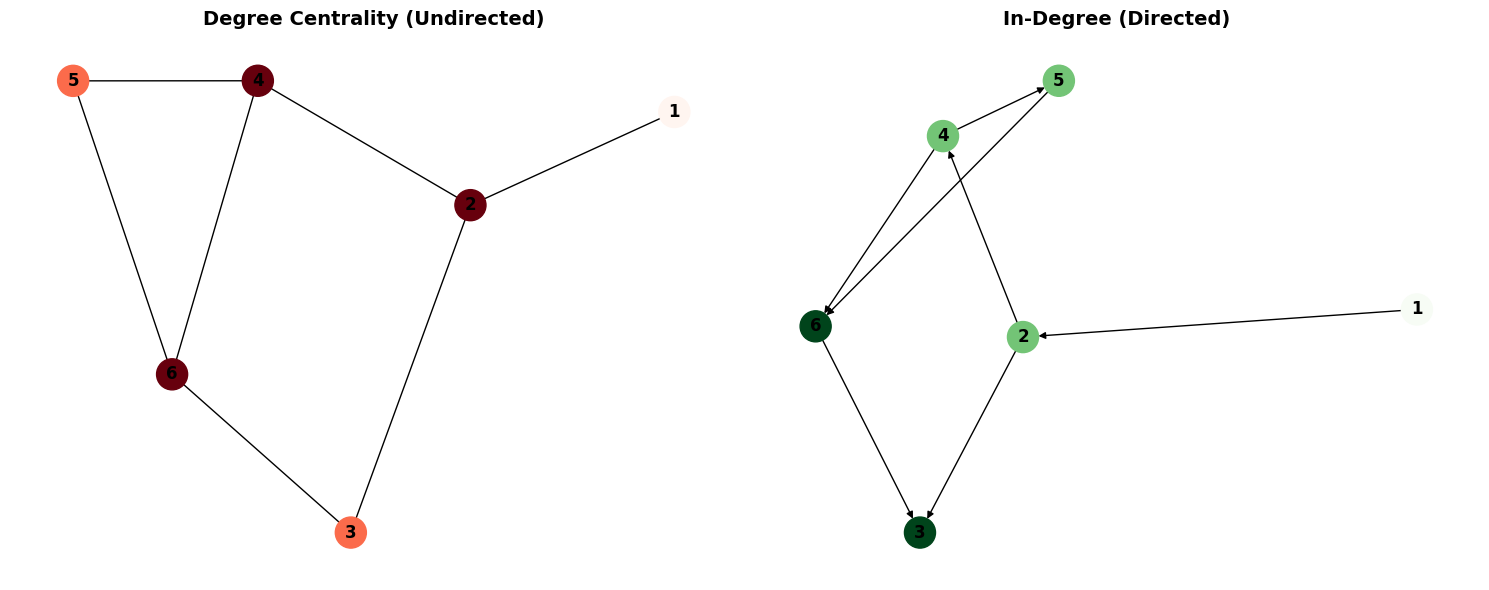

In [5]:
# Visualize degree centrality
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Undirected graph with degree centrality coloring
node_colors_undir = [degree_centrality_undir[node] for node in G_undirected.nodes()]
nx.draw(G_undirected, pos1, with_labels=True, node_color=node_colors_undir, 
        cmap=plt.cm.Reds, node_size=500, font_size=12, font_weight='bold', ax=ax1)
ax1.set_title('Degree Centrality (Undirected)', fontsize=14, fontweight='bold')

# Directed graph with in-degree coloring
node_colors_dir = [in_degree[node] for node in G_directed.nodes()]
nx.draw(G_directed, pos2, with_labels=True, node_color=node_colors_dir, 
        cmap=plt.cm.Greens, node_size=500, font_size=12, font_weight='bold', ax=ax2)
ax2.set_title('In-Degree (Directed)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 3. Closeness Centrality

Closeness centrality measures how close a node is to all other nodes in the network.

In [6]:
# Calculate closeness centrality
closeness_centrality_undir = nx.closeness_centrality(G_undirected)
closeness_centrality_dir = nx.closeness_centrality(G_directed)

print("Closeness Centrality (Undirected):")
for node, centrality in closeness_centrality_undir.items():
    print(f"Node {node}: {centrality:.3f}")

print("\nCloseness Centrality (Directed):")
for node, centrality in closeness_centrality_dir.items():
    print(f"Node {node}: {centrality:.3f}")

Closeness Centrality (Undirected):
Node 1: 0.455
Node 2: 0.714
Node 3: 0.625
Node 4: 0.714
Node 6: 0.625
Node 5: 0.556

Closeness Centrality (Directed):
Node 1: 0.000
Node 2: 0.200
Node 4: 0.267
Node 3: 0.625
Node 5: 0.300
Node 6: 0.457


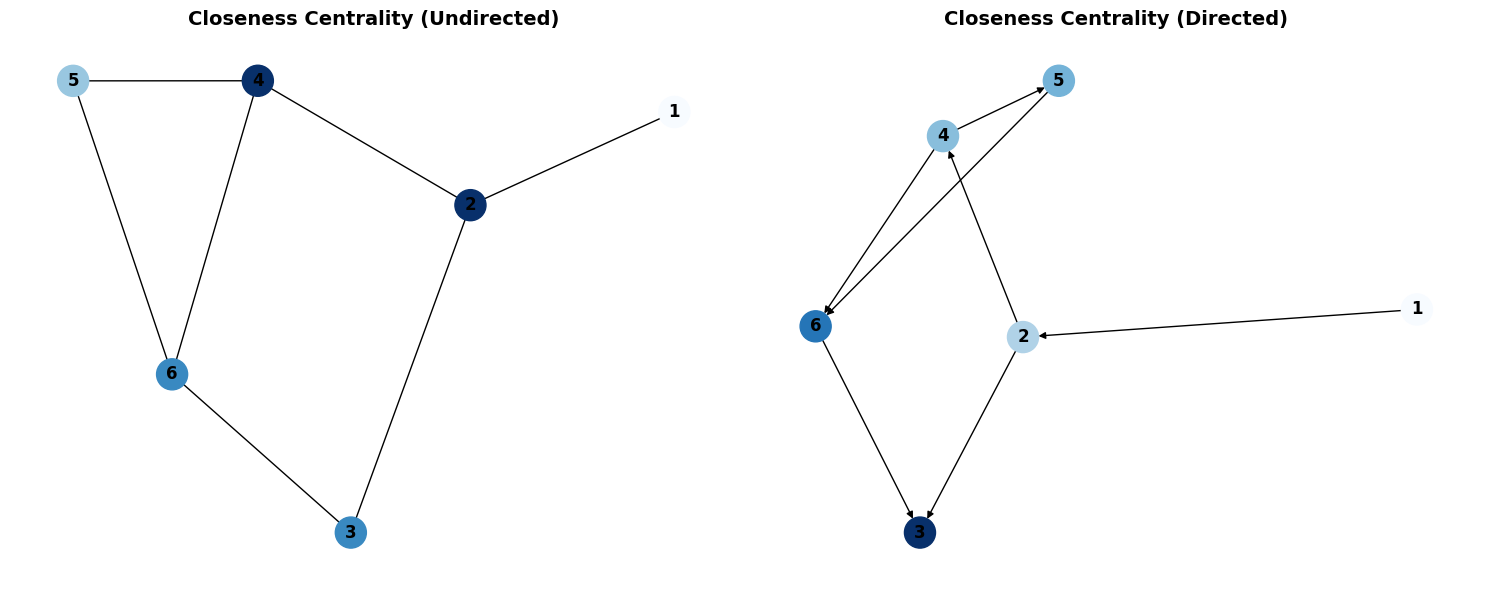

In [7]:
# Visualize closeness centrality
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Undirected graph with closeness centrality coloring
node_colors_closeness_undir = [closeness_centrality_undir[node] for node in G_undirected.nodes()]
nx.draw(G_undirected, pos1, with_labels=True, node_color=node_colors_closeness_undir, 
        cmap=plt.cm.Blues, node_size=500, font_size=12, font_weight='bold', ax=ax1)
ax1.set_title('Closeness Centrality (Undirected)', fontsize=14, fontweight='bold')

# Directed graph with closeness centrality coloring
node_colors_closeness_dir = [closeness_centrality_dir[node] for node in G_directed.nodes()]
nx.draw(G_directed, pos2, with_labels=True, node_color=node_colors_closeness_dir, 
        cmap=plt.cm.Blues, node_size=500, font_size=12, font_weight='bold', ax=ax2)
ax2.set_title('Closeness Centrality (Directed)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Betweenness Centrality

Betweenness centrality measures how often a node lies on the shortest paths between other nodes.

In [8]:
# Calculate betweenness centrality
betweenness_centrality_undir = nx.betweenness_centrality(G_undirected)
betweenness_centrality_dir = nx.betweenness_centrality(G_directed)

print("Betweenness Centrality (Undirected):")
for node, centrality in betweenness_centrality_undir.items():
    print(f"Node {node}: {centrality:.3f}")

print("\nBetweenness Centrality (Directed):")
for node, centrality in betweenness_centrality_dir.items():
    print(f"Node {node}: {centrality:.3f}")

Betweenness Centrality (Undirected):
Node 1: 0.000
Node 2: 0.450
Node 3: 0.100
Node 4: 0.300
Node 6: 0.150
Node 5: 0.000

Betweenness Centrality (Directed):
Node 1: 0.000
Node 2: 0.200
Node 4: 0.200
Node 3: 0.000
Node 5: 0.000
Node 6: 0.100


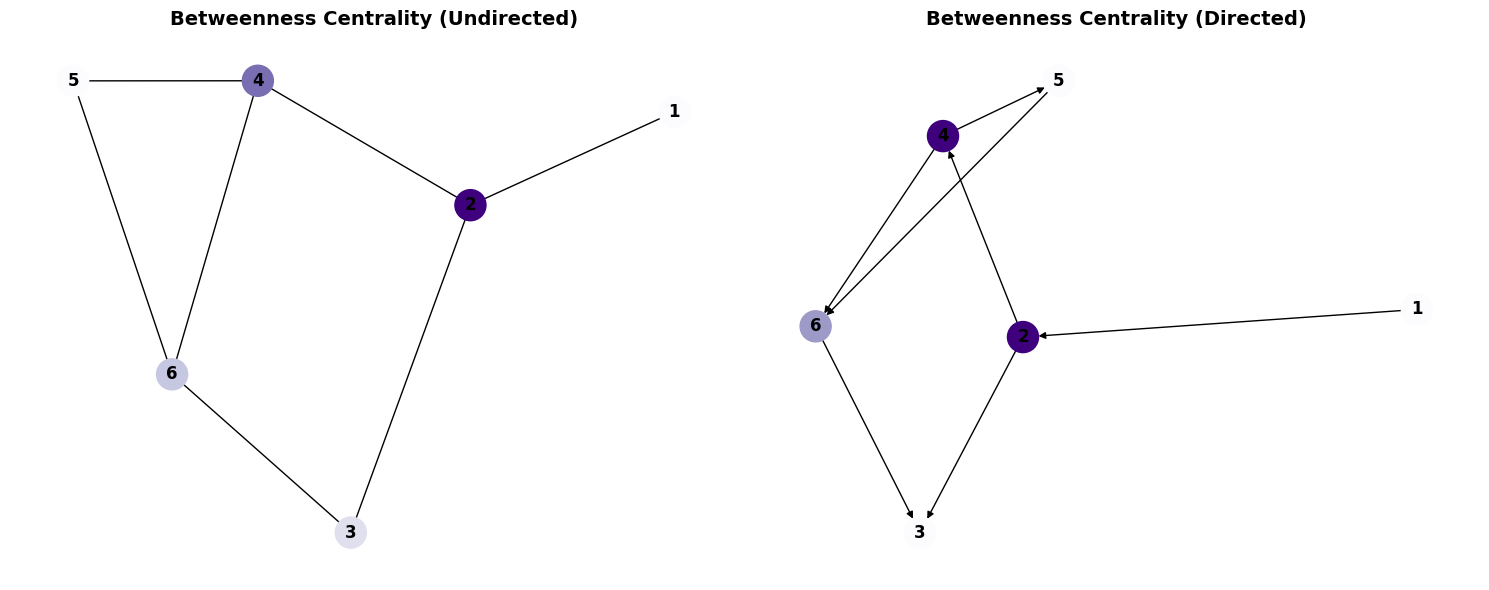

In [9]:
# Visualize betweenness centrality
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Undirected graph with betweenness centrality coloring
node_colors_between_undir = [betweenness_centrality_undir[node] for node in G_undirected.nodes()]
nx.draw(G_undirected, pos1, with_labels=True, node_color=node_colors_between_undir, 
        cmap=plt.cm.Purples, node_size=500, font_size=12, font_weight='bold', ax=ax1)
ax1.set_title('Betweenness Centrality (Undirected)', fontsize=14, fontweight='bold')

# Directed graph with betweenness centrality coloring
node_colors_between_dir = [betweenness_centrality_dir[node] for node in G_directed.nodes()]
nx.draw(G_directed, pos2, with_labels=True, node_color=node_colors_between_dir, 
        cmap=plt.cm.Purples, node_size=500, font_size=12, font_weight='bold', ax=ax2)
ax2.set_title('Betweenness Centrality (Directed)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. PageRank Centrality

PageRank is a variant of eigenvector centrality that includes a damping factor.

In [10]:
# Calculate PageRank centrality
pagerank_centrality_undir = nx.pagerank(G_undirected)
pagerank_centrality_dir = nx.pagerank(G_directed)

print("PageRank Centrality (Undirected):")
for node, centrality in pagerank_centrality_undir.items():
    print(f"Node {node}: {centrality:.3f}")

print("\nPageRank Centrality (Directed):")
for node, centrality in pagerank_centrality_dir.items():
    print(f"Node {node}: {centrality:.3f}")

PageRank Centrality (Undirected):
Node 1: 0.087
Node 2: 0.218
Node 3: 0.145
Node 4: 0.205
Node 6: 0.204
Node 5: 0.141

PageRank Centrality (Directed):
Node 1: 0.070
Node 2: 0.130
Node 4: 0.126
Node 3: 0.321
Node 5: 0.124
Node 6: 0.229


## 6. Real-World Example: Les Miserables Network

Let's apply centrality measures to a real network - the character network from Les Miserables.

In [11]:
# Load the Les Miserables network
G_lesmis = nx.les_miserables_graph()
print(f"Les Miserables network: {G_lesmis.number_of_nodes()} nodes, {G_lesmis.number_of_edges()} edges")

# Calculate all centrality measures
degree_lesmis = nx.degree_centrality(G_lesmis)
closeness_lesmis = nx.closeness_centrality(G_lesmis)
betweenness_lesmis = nx.betweenness_centrality(G_lesmis)
pagerank_lesmis = nx.pagerank(G_lesmis)

# Create a DataFrame for comparison
centrality_df = pd.DataFrame({
    'Character': list(G_lesmis.nodes()),
    'Degree': [degree_lesmis[node] for node in G_lesmis.nodes()],
    'Closeness': [closeness_lesmis[node] for node in G_lesmis.nodes()],
    'Betweenness': [betweenness_lesmis[node] for node in G_lesmis.nodes()],
    'PageRank': [pagerank_lesmis[node] for node in G_lesmis.nodes()]
})

# Show top 10 characters by each centrality measure
print("\nTop 10 characters by Degree Centrality:")
print(centrality_df.nlargest(10, 'Degree')[['Character', 'Degree']])

print("\nTop 10 characters by Closeness Centrality:")
print(centrality_df.nlargest(10, 'Closeness')[['Character', 'Closeness']])

print("\nTop 10 characters by Betweenness Centrality:")
print(centrality_df.nlargest(10, 'Betweenness')[['Character', 'Betweenness']])

print("\nTop 10 characters by PageRank:")
print(centrality_df.nlargest(10, 'PageRank')[['Character', 'PageRank']])

Les Miserables network: 77 nodes, 254 edges

Top 10 characters by Degree Centrality:
     Character    Degree
10     Valjean  0.473684
48    Gavroche  0.289474
55      Marius  0.250000
27      Javert  0.223684
25  Thenardier  0.210526
23     Fantine  0.197368
58    Enjolras  0.197368
62  Courfeyrac  0.171053
64     Bossuet  0.171053
63     Bahorel  0.157895

Top 10 characters by Closeness Centrality:
     Character  Closeness
10     Valjean   0.644068
55      Marius   0.531469
25  Thenardier   0.517007
27      Javert   0.517007
48    Gavroche   0.513514
58    Enjolras   0.481013
26     Cosette   0.477987
64     Bossuet   0.475000
68   Gueulemer   0.463415
69       Babet   0.463415

Top 10 characters by Betweenness Centrality:
           Character  Betweenness
10           Valjean     0.569989
1             Myriel     0.176842
48          Gavroche     0.165113
55            Marius     0.132032
23           Fantine     0.129645
25        Thenardier     0.074901
27            Javert     0

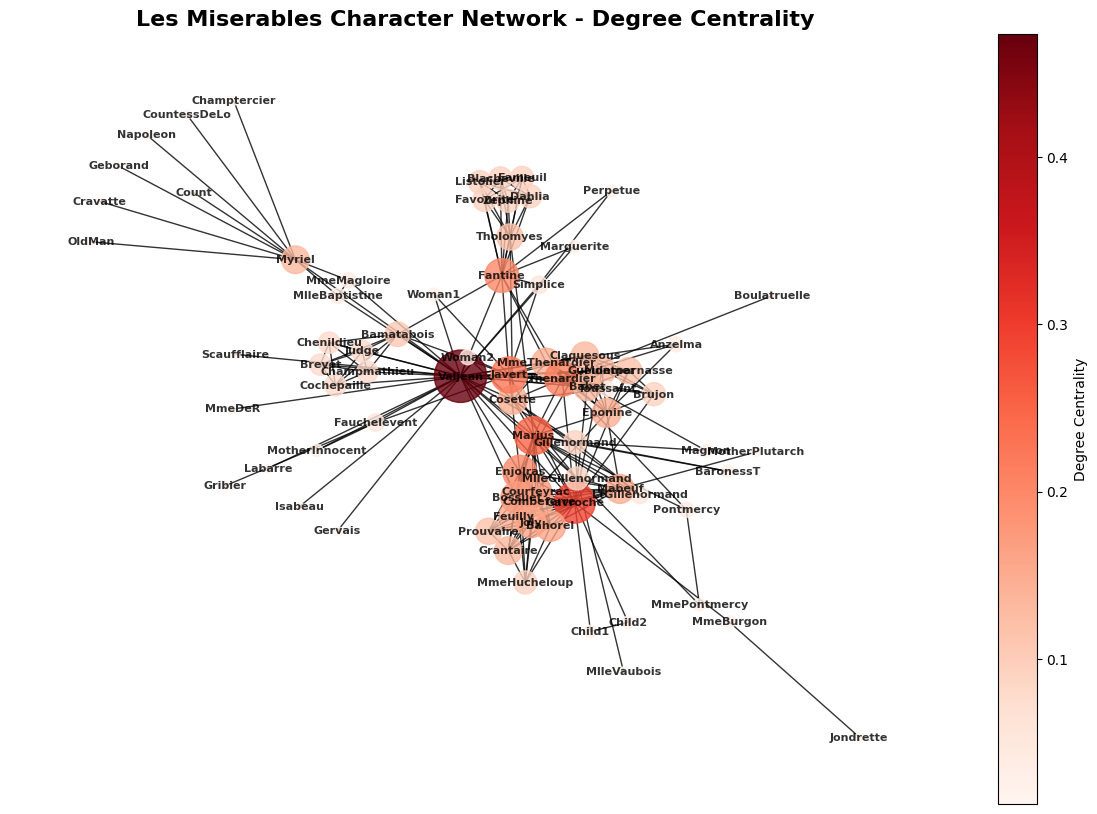

In [14]:
# Visualize the Les Miserables network with degree centrality
fig, ax = plt.subplots(figsize=(15, 10))
pos_lesmis = nx.spring_layout(G_lesmis, seed=42)

# Color nodes by degree centrality
node_colors_lesmis = [degree_lesmis[node] for node in G_lesmis.nodes()]
node_sizes_lesmis = [degree_lesmis[node] * 3000 for node in G_lesmis.nodes()]

# Create the network plot
scatter = nx.draw(G_lesmis, pos_lesmis, with_labels=True, node_color=node_colors_lesmis, 
        cmap=plt.cm.Reds, node_size=node_sizes_lesmis, font_size=8, 
        font_weight='bold', alpha=0.8, ax=ax)

plt.title('Les Miserables Character Network - Degree Centrality', fontsize=16, fontweight='bold')

# Create colorbar with proper mappable
sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=plt.Normalize(vmin=min(node_colors_lesmis), vmax=max(node_colors_lesmis)))
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Degree Centrality')
plt.show()

## 7. Correlation Between Centrality Measures

Let's examine how different centrality measures correlate with each other.

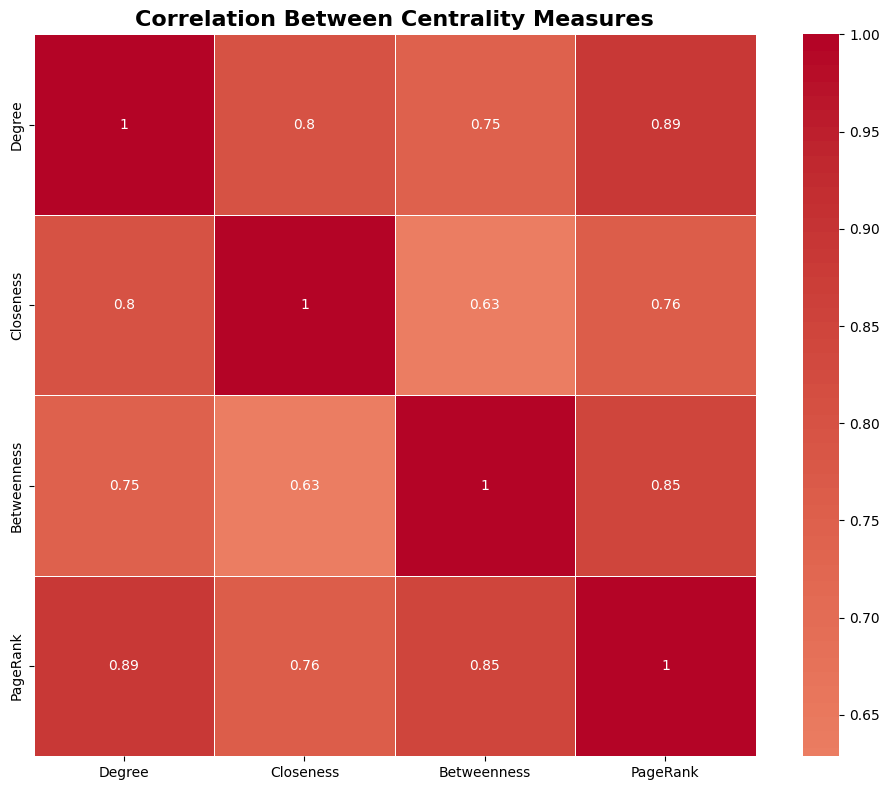

In [13]:
# Calculate correlation matrix
correlation_matrix = centrality_df[['Degree', 'Closeness', 'Betweenness', 'PageRank']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Between Centrality Measures', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 8. Summary and Key Insights

### Key Takeaways:

1. **Degree Centrality**: Identifies the most connected nodes
2. **Closeness Centrality**: Finds nodes that can efficiently spread information
3. **Betweenness Centrality**: Identifies bridge nodes that control network flow
4. **PageRank**: Combines random walk with teleportation for robust ranking

### When to Use Each Measure:
- **Degree**: Simple analysis of connectivity
- **Closeness**: Information spreading or accessibility
- **Betweenness**: Network resilience and flow control
- **PageRank**: Web-like structures and directed networks